<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Face_Recognition_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
{'svc__C': 5, 'svc__gamma': 0.005}
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.81        16
     Colin Powell       0.87      0.85      0.86        61
  Donald Rumsfeld       0.75      0.69      0.72        35
    George W Bush       0.77      0.97      0.86       125
Gerhard Schroeder       0.86      0.66      0.75        29
      Hugo Chavez       1.00      0.68      0.81        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.93      0.74      0.83        35

         accuracy                           0.83       337
        macro avg       0.90      0.76      0.81       337
     weighted avg       0.84      0.83      0.83       337



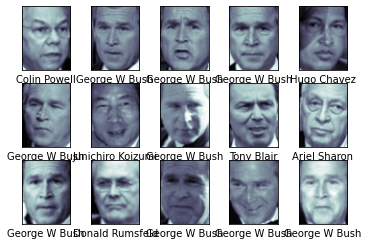

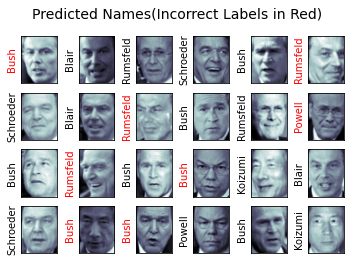

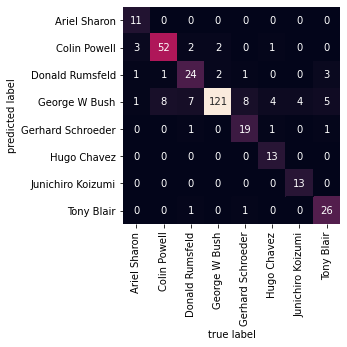

정확도: 0.827893175074184


In [36]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

faces =fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,random_state=0)

fig,ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap='bone')
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

pca=RandomizedPCA(n_components=150,whiten=True,random_state=0)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)


param_grid = {'svc__C': [1,5,10,50],'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)
model=grid.best_estimator_
yfit=model.predict(Xtest)

fig,ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
  axi.set(xticks=[],yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names(Incorrect Labels in Red)',size=14)
print(classification_report(ytest,yfit,target_names=faces.target_names))
plt.show()

mat=confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

from sklearn.metrics import accuracy_score
print("정확도:",accuracy_score(ytest,yfit))



